This notebook supplements the Regression_Analysis_NHL_Full_Dataset.ipynb. The regression analysis performed below mirrors what has already been done in the aforementioned notebook, but is restricted to data from the 2023-2024 NHL season.

Install the required libraries.

In [1]:
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Read in the data from the NHL_PenaltyKilling_2023_24.csv.

In [2]:
import pandas

# Read data from a .csv file
dataframe_2023_24 = pandas.read_csv('NHL_PenaltyKilling_2023_24.csv')

# Print the first few rows of the .csv file as a sanity check
print(dataframe_2023_24.head())

              Team  Save %  Skating Distance Penalty Killing (Total)  \
0    Anaheim Ducks   0.894                                    406.20   
1  Arizona Coyotes   0.901                                    345.69   
2    Boston Bruins   0.915                                    374.77   
3   Buffalo Sabres   0.903                                    326.87   
4   Calgary Flames   0.897                                    322.13   

   Skating Distance Penalty Killing (per 60)  \
0                                       9.45   
1                                       9.66   
2                                      10.22   
3                                       9.97   
4                                      10.12   

   Skating Distance Penalty Killing (per PIM)  Penalty Kill %  \
0                                    0.366606            72.4   
1                                    0.366197            76.3   
2                                    0.486714            82.5   
3                 

Perform the regression analysis. We jump straight to the regression with the four parameters: Save %, Distance Skating Penalty Killing (per PIM), SA/GP, and Power Play %.
These parameters are from the initial regression analysis performed on the full dataset in Regression_Analysis_NHL_Full_Dataset.ipynb after removing predictors that were causing multicollinearity problems.

In [3]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = dataframe_2023_24[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP' , 'Power Play%']]
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     8.597
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           0.000131
Time:                        18:17:23   Log-Likelihood:                -72.293
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      27   BIC:                             161.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We still get a warning about multicollinearity, likely due to the constant again. We can calculate the VIF values to confirm this.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables
X = dataframe_2023_24[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP' , 'Power Play%']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pandas.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF data
print(vif_data)

                                     Variable           VIF
0                                       const  15462.692557
1                                      Save %      1.268838
2  Skating Distance Penalty Killing (per PIM)      1.241539
3                                       SA/GP      1.222132
4                                 Power Play%      1.228642


Much like what was done with the full dataset, we can rerun the regression analysis with the predictors


1.   Centered
2.   Standardized



Regression analysis with centered predictors.

In [5]:
# Define the dependent and independent variables
# Center the dependent variables
X_centered = dataframe_2023_24[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'Power Play%']].apply(lambda x: x - x.mean())
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the centered predictors
X_centered = sm.add_constant(X_centered)

# Fit the regression model with centered predictors
model_centered = sm.OLS(y, X_centered).fit()

# Print the summary of the regression model
print(model_centered.summary())


                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     8.597
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           0.000131
Time:                        18:17:31   Log-Likelihood:                -72.293
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      27   BIC:                             161.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Regresion analysis with standardized predictors.

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_standardized = scaler.fit_transform(dataframe_2023_24[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'Power Play%']])

# Convert the standardized predictors back to a DataFrame
X_standardized = pandas.DataFrame(X_standardized, columns=['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP', 'Power Play%'])

# Add a constant to the standardized predictors
X_standardized = sm.add_constant(X_standardized)

# Fit the regression model with standardized predictors
model_standardized = sm.OLS(y, X_standardized).fit()

# Print the summary of the regression model
print(model_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     8.597
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           0.000131
Time:                        18:17:35   Log-Likelihood:                -72.293
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      27   BIC:                             161.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Again, as was done with the full dataset, we will run some simple regression analysis for each of the four predicotrs.

Starting with Save %.

In [7]:
# Define the dependent and independent variables
X = dataframe_2023_24['Save %']
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.935
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.174
Time:                        18:17:39   Log-Likelihood:                -84.434
No. Observations:                  32   AIC:                             172.9
Df Residuals:                      30   BIC:                             175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5286     69.444     -0.252      0.8

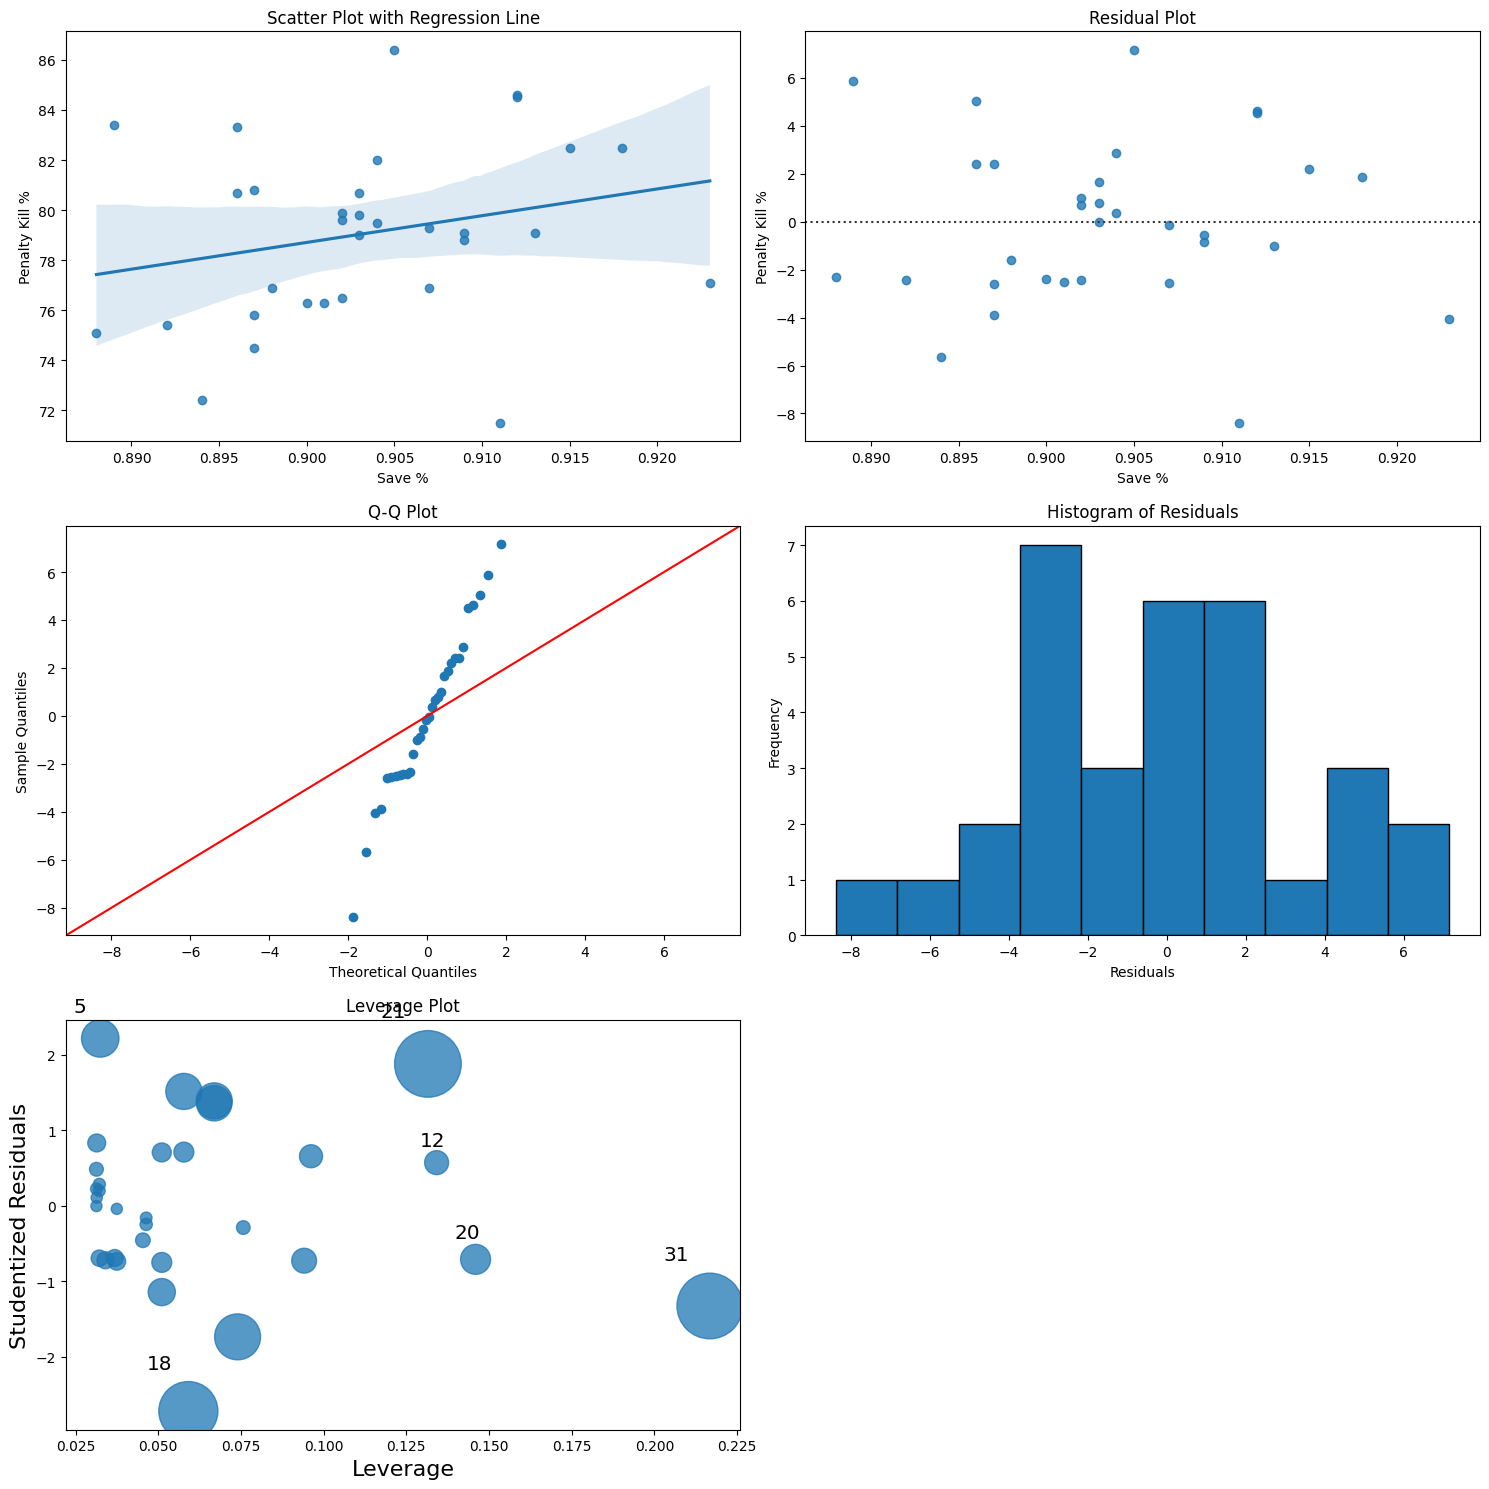

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Skating Distance Penalty Killing (per PIM) simple regression.

In [9]:
# Define the dependent and independent variables
X = dataframe_2023_24['Skating Distance Penalty Killing (per PIM)']
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.813
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0222
Time:                        18:18:07   Log-Likelihood:                -82.600
No. Observations:                  32   AIC:                             169.2
Df Residuals:                      30   BIC:                             172.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

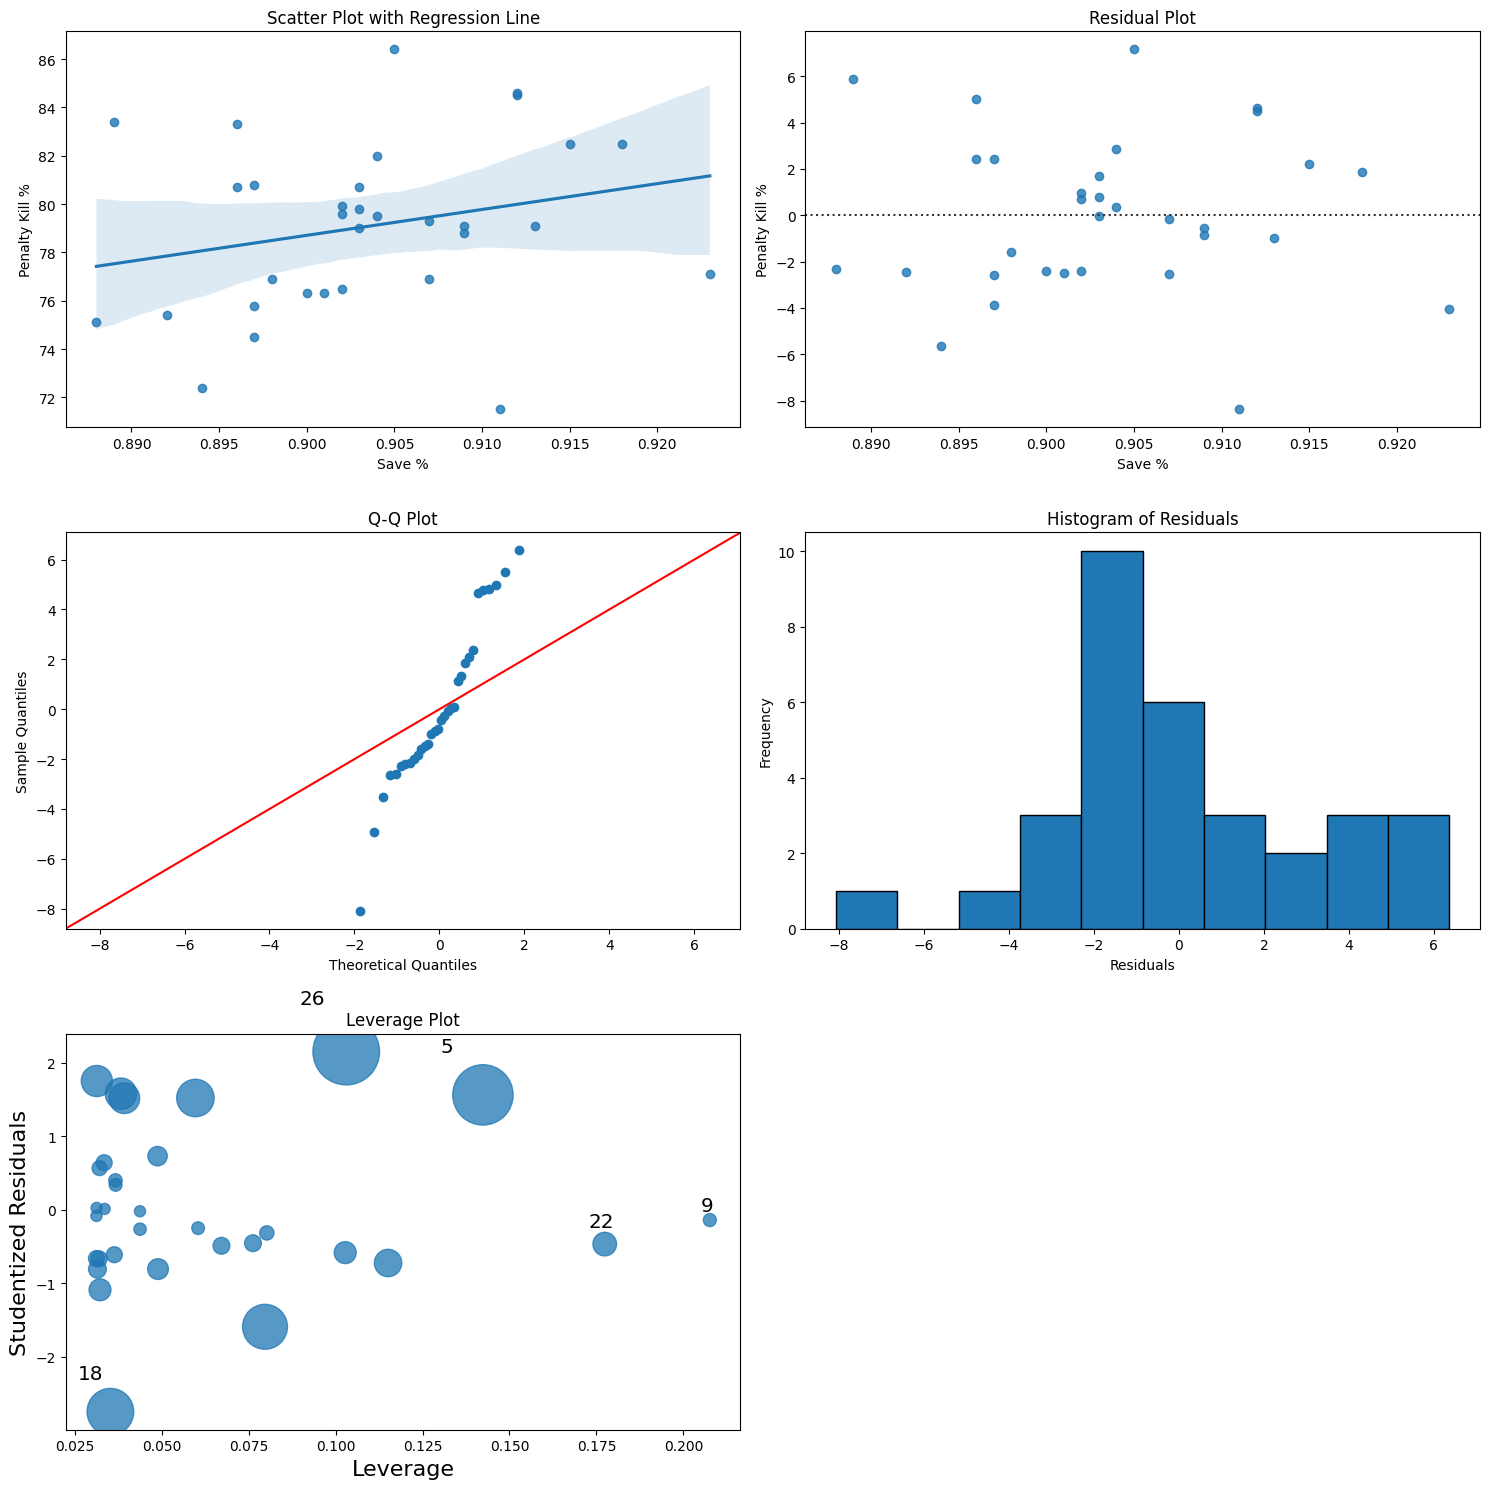

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

SA/GP simple regression.

In [11]:
# Define the dependent and independent variables
X = dataframe_2023_24['SA/GP']
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     27.10
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.30e-05
Time:                        18:18:21   Log-Likelihood:                -75.137
No. Observations:                  32   AIC:                             154.3
Df Residuals:                      30   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.4516      6.813     16.800      0.0

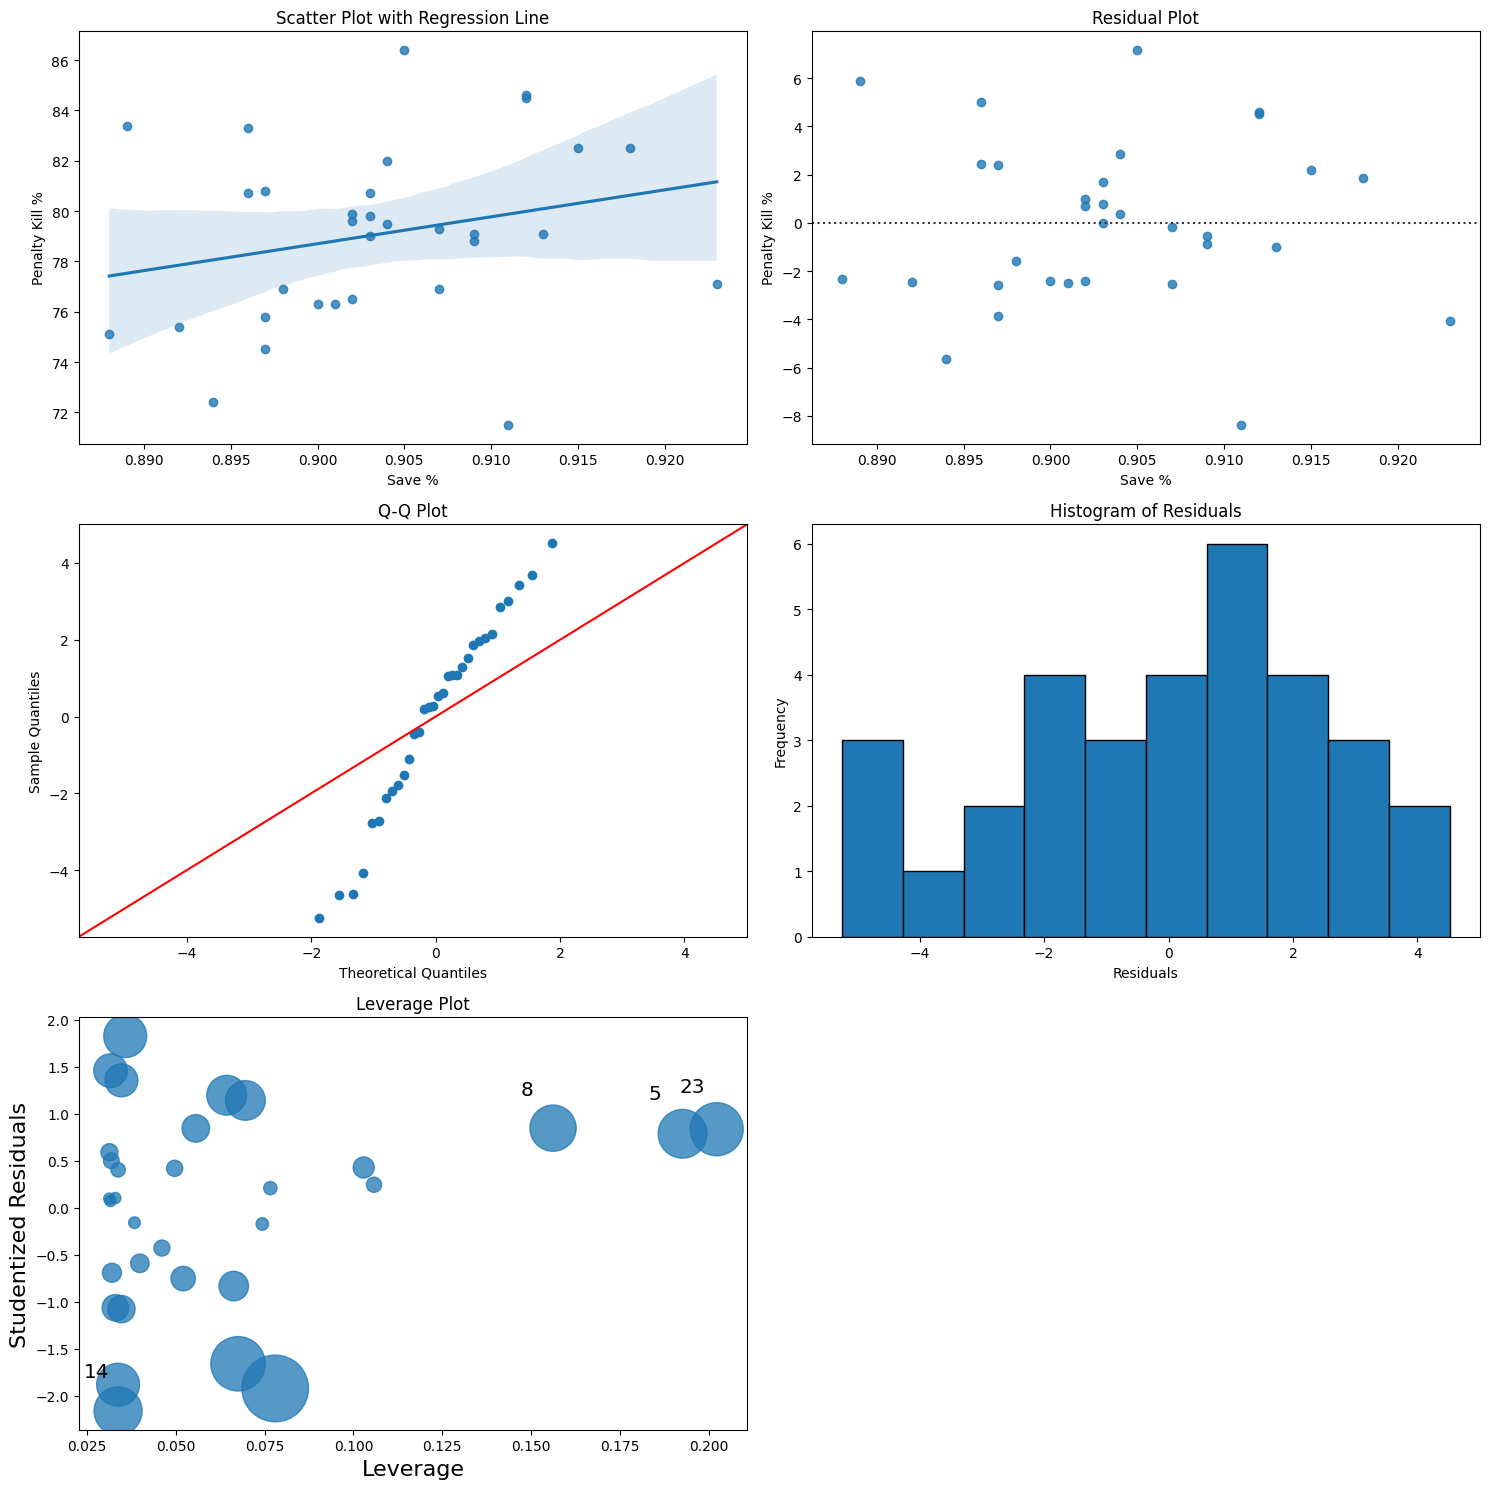

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Power Play % simple regression.

In [13]:
# Define the dependent and independent variables
X = dataframe_2023_24['Power Play%']
y = dataframe_2023_24['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     4.747
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0373
Time:                        18:18:34   Log-Likelihood:                -83.084
No. Observations:                  32   AIC:                             170.2
Df Residuals:                      30   BIC:                             173.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          71.8201      3.379     21.253      

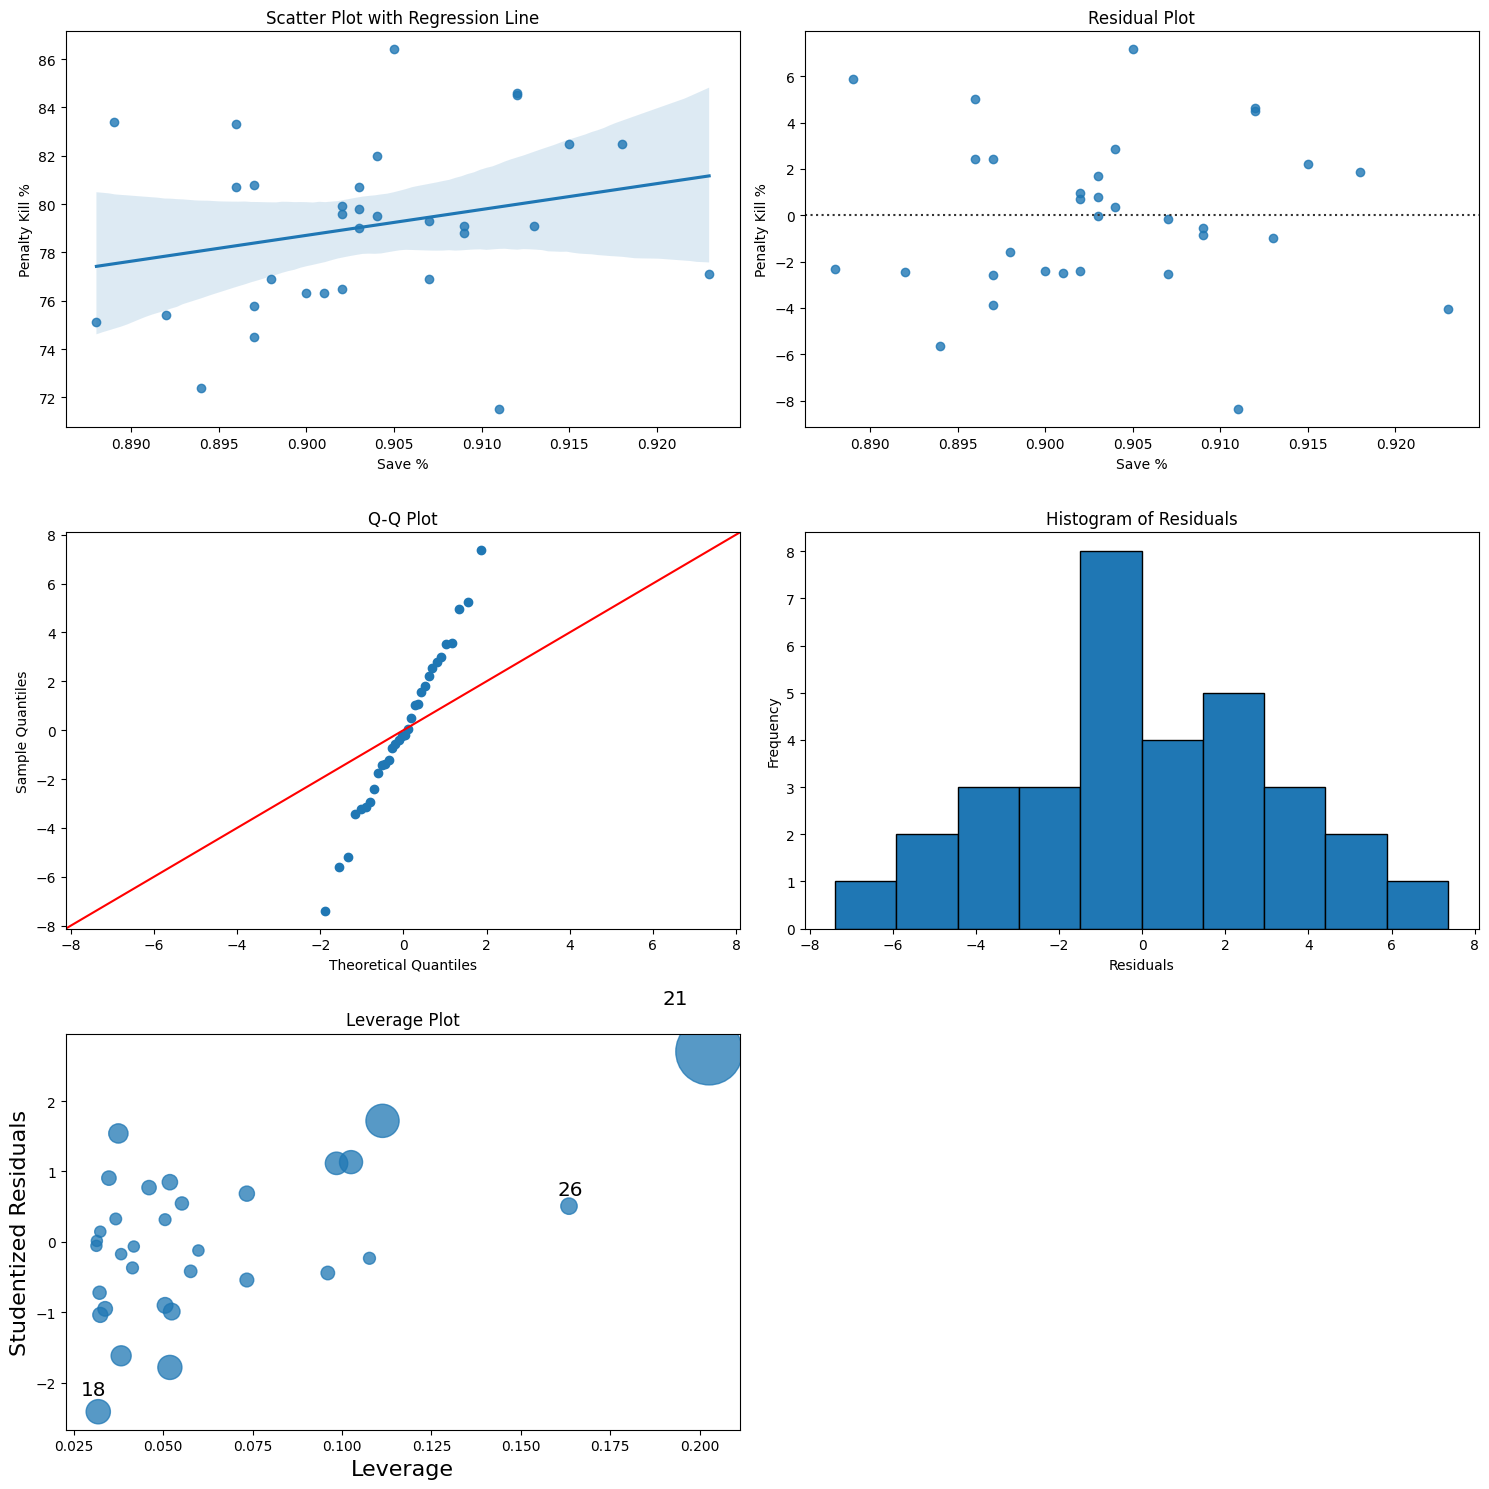

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe_2023_24, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()